##Homework -week13


---

```
**TEAM SPARTANS**

Jack Kalavadia
Pramatha Nadig
Rishikesh Andhare
Rutvik Moradiya

```


Part 6: Mining News Articles and Assembling a Knowledge Graph

--Make sure you have completed all of the items in the previous homeworks.

HW enhancements
Take an answer from the middle of the news article and query via RAG and see if you can get a acceptable response via RAG
2. Make a statement that describes the key events in that era
eg using bard quote the prompt and answer
3. ask the question about the relationship between the poet and the events and how their poems reflect the issues of their times
4.  represent at least one poem as a knowledge graph using any of the three methods we discussed

5. represent the news article as a knowledge graph

6. connect them using transitive closure and compare the article and the poem for similarity

Pro tips:

1. identify POS and use noun-verb-noun as a means of node-edge-node for networkx. Create binary graphs for each poem, then use transitive closure to create larger graphs for the poem: Add approx nodes through approx joins, to the set, which is a transitive closure set

2. compare regular poems with the statistics of pushcart nominated or awarded poems: counts of POS, topics, sentiment, stats for ratios of NN/Verbs, NN/Adv, NN/AdJectives.

3. create a json "repository" for each poet : poems, POS, topics

4. use top2vec, doc2vec to compare gold standard with normal poems

]

[for next week: 5. Find the poem topics of a poet (say from 20 poems of the poet) . Find an API, Google Custom Search and others like the nytimes to find articles that are relevant to the topics you found. Create a KG for each article and connect them using transitive closure (see number one above)]

In [4]:
!pip install nltk
!pip install sentence-transformers
!pip install contractions
!pip install pandas
!pip install bertopic
!pip install --upgrade gensim
!pip install pyLDAvis
!pip install spacy
!pip install requests
!pip install beautifulsoup4
!pip install lxml
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=bf4a1c4bb55e5317119a4186223e41274b42c58b0c8f21944b5d87e064fb9797
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 57.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━

In [2]:
import requests
import pandas as pd
import bs4 as bs
import urllib.request
import json
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from nltk.corpus import stopwords
from transformers import pipeline
from spacy import displacy
from bertopic import BERTopic
import os

import pyLDAvis
import gensim
import spacy
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim as gensimvis
from gensim.utils import simple_preprocess

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


Scarpping 30 Poems for the poet John Keats and saving it to drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [4]:
poet1 = "John Keats"
poet2 = "John Keats"
store_loc = "/content/drive/MyDrive/poets/"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
import warnings
warnings.filterwarnings('ignore', 'Calling')
warnings.filterwarnings('ignore', 'For a faster implementation')
warnings.filterwarnings('ignore', 'In')
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')
warnings.filterwarnings('ignore', '`np')
warnings.filterwarnings('ignore', 'SelectableGroups')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is

True

In [8]:
def clean_txt(text):
    text=text.replace(u'\xa0', u' ').replace(r'\r',u'\n').replace(r'\n', ' ').replace('\n', ' ').replace('\t', ' ')
    text = contractions.fix(text)
    text = text.strip().lower()
    text = re.sub(r"'", ' ', text)
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = ' '.join([w for w in text.split() if len(w)>1])
    text = re.sub(' +', ' ', text)
    text = ''.join(text)
    return text

def scrapePoemFromURL(poem_url_list):
    poems_results=[]
    for url in poem_url_list:
        header = {'User-Agent':'Mozilla/5.0'}
        requests = urllib.request.Request(url,headers=header)
        requestread = urllib.request.urlopen(requests).read()
        soup = bs.BeautifulSoup(requestread,'html.parser')
        poem_for_human = soup.find_all('div', class_="poem_body")[0].text.replace("© by owner. provided at no charge for educational purposes", "")
        poem_for_machine = (clean_txt(poem_for_human))
        poem_title = soup.find_all('h1')[0].text
        poems_results.append([poem_title, poem_for_machine, poem_for_human])
    return poems_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
def get_poem_url_json(poet):
    site = "https://allpoetry.com"
    search = "https://allpoetry.com/items/read_by/"
    page = 1
    URL_list = list()
    print("site")
    while len(URL_list) < 30:
        url = search + poet + "?page=" + str(page)

        response = requests.get(url)
        soup = bs.BeautifulSoup(response.text, 'lxml')
        poem_list = soup.find_all('a', href=True, class_='nocolor fn')
        for i in range(len(poem_list)):
            #print(poem_list[i]['href'])
            URL_list.append(site + poem_list[i]['href'])
            if len(URL_list) == 30:
                break
        page += 1
    return {"poet":poet, "URL":URL_list}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
pd_title_list = ["Title", "Poem", "Poem_for_Human"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
def getPoem(file_name, URLs):
    df = pd.DataFrame()
    if os.path.exists(file_name):
        df = pd.read_csv(file_name)
    else:
        os.makedirs(os.path.dirname(file_name), exist_ok=True)
        df = pd.DataFrame(scrapePoemFromURL(URLs), columns=pd_title_list)
        df.to_csv(file_name)
    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
file_name = store_loc + poet1.replace(" ", "_") + ".csv"
WS_df = getPoem(file_name, get_poem_url_json(poet1)['URL'])

file_name = store_loc + poet2.replace(" ", "_") + ".csv"
JWG_df = getPoem(file_name, get_poem_url_json(poet2)['URL'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site
site


In [13]:
WS_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                                              Title  \
0            0   Sonnet: When I Have Fears That I May Cease To Be   
1            1                                      Ode To Autumn   
2            2                               Ode To A Nightingale   
3            3                                A Song About Myself   
4            4                               Ode On A Grecian Urn   
5            5                                      Meg Merrilies   
6            6          Sonnet XV. On The Grasshopper And Cricket   
7            7                                     Lamia. Part I    
8            8                           La Belle Dame Sans Merci   
9            9  Sonnet. Written On A Blank Page In Shakespeare...   
10          10                                   Endymion: Book I   
11          11   Sonnet XI. On First Looking Into Chapman's Homer   
12          12                                    Sonnet To Sleep   
13          13  Sonnet. If By Dull Rhymes Our English Must Be ...   
14          14                            Sonnet VII. To Solitude   
15          15  Two Sonnets. To Haydon, With A Sonnet Written ...   
16          16                                   You Say You Love   
17          17                     Give Me Women, Wine, And Snuff   
18          18                                      Ode To Psyche   
19          19                                 Ode  On Melancholy   
20          20                                    Sonnet To Homer   
21          21       La Belle Dame Sans Merci (Original version )   
22          22               Stanzas. In A Drear-Nighted December   
23          23                                   This Living Hand   
24          24                                             Staffa   
25          25                          Sonnet. The Human Seasons   
26          26                               Hither, Hither, Love   
27          27                                  Hyperion. Book I    
28          28                        Fill For Me A Brimming Bowl   
29          29  Isabella; Or, The Pot Of Basil: A Story From B...   

                                                 Poem  \
0   when have fears that may cease to be before my...   
1   season of mists and mellow fruitfulness close ...   
2   my heart aches and drowsy numbness pains my se...   
3   there was naughty boy naughty boy was he he wo...   
4   thou still unravish bride of quietness thou fo...   
5   old meg she was gipsy and liv upon the moors h...   
6   the poetry of earth is never dead when all the...   
7   upon time before the faery broods drove nymph ...   
8   ah what can ail thee wretched wight alone and ...   
9   bright star would were stedfast as thou art no...   
10  thing of beauty is joy for ever its loveliness...   
11  much have travell in the realms of gold and ma...   
12  soft embalmer of the still midnight shutting w...   
13  if by dull rhymes our english must be chain an...   
14  solitude if must with thee dwell let it not be...   
15  haydon forgive me that cannot speak definitive...   
16  you say you love but with voice chaster than n...   
17  give me women wine and snuff until cry out hol...   
18  goddess hear these tuneless numbers wrung by s...   
19  no no go not to lethe neither twist wolf bane ...   
20  standing aloof in giant ignorance of thee hear...   
21  oh what can ail thee knight at arms alone and ...   
22  in drear nighted december too happy happy tree...   
23  this living hand now warm and capable of earne...   
24  not aladdin magian ever such work began not th...   
25  four seasons fill the measure of the year ther...   
26  hither hither love it is shady mead hither hit...   
27  deep in the shady sadness of vale far sunken f...   
28  fill for me brimming bowl and in it let me dro...   
29  fair isabel poor simple isabel lorenzo young p...   

                                       Poem_for_Human  
0   When I have fears that I may cease t

fetching all poems from John_Keats.csv

In [14]:

import pandas as pd

# Replace 'path_to_your_csv_file.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/poets/John_Keats.csv'
df = pd.read_csv(file_path)

# Read the CSV file into a pandas DataFrame
poem_column = df['Poem']

# Display the values in the 'Poem' column
print(poem_column)


0     when have fears that may cease to be before my...
1     season of mists and mellow fruitfulness close ...
2     my heart aches and drowsy numbness pains my se...
3     there was naughty boy naughty boy was he he wo...
4     thou still unravish bride of quietness thou fo...
5     old meg she was gipsy and liv upon the moors h...
6     the poetry of earth is never dead when all the...
7     upon time before the faery broods drove nymph ...
8     ah what can ail thee wretched wight alone and ...
9     bright star would were stedfast as thou art no...
10    thing of beauty is joy for ever its loveliness...
11    much have travell in the realms of gold and ma...
12    soft embalmer of the still midnight shutting w...
13    if by dull rhymes our english must be chain an...
14    solitude if must with thee dwell let it not be...
15    haydon forgive me that cannot speak definitive...
16    you say you love but with voice chaster than n...
17    give me women wine and snuff until cry out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Scrapped and fetched 30 Articles related to poet John Keats

In [15]:
# Replace 'path_to_your_csv_file.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/poets/John_Keats_Articles.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it was loaded correctly
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                                            Article  \
0           0  What major global events occurred during John ...   
1           1  How might the French Revolution have impacted ...   
2           2  How did the Napoleonic Wars contribute to the ...   
3           3   In what ways did the Industrial Revolution, c...   
4           4   How did the geopolitical landscape of England...   

                                      GeneratedValue  
0  John Keats inhabited a world marked by transfo...  
1  The French Revolution, a tumultuous epoch of r...  
2  The Napoleonic Wars, casting a pervasive shado...  
3  The sweeping changes brought forth by the Indu...  
4  The geopolitical landscape of early 19th-centu...

In [16]:
values =df['GeneratedValue']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


30 Articles related to John Keats

In [17]:
print(values)

0     John Keats inhabited a world marked by transfo...
1     The French Revolution, a tumultuous epoch of r...
2     The Napoleonic Wars, casting a pervasive shado...
3     The sweeping changes brought forth by the Indu...
4     The geopolitical landscape of early 19th-centu...
5     John Keats lived through a period of notable h...
6     John Keats's poetic style and thematic choices...
7     John Keats's poetic endeavors were intricately...
8     John Keats's personal experiences, including h...
9     John Keats's poetic creations bear the unmista...
10    John Keats's relationships, notably his intens...
11    John Keats emerged as a transformative figure ...
12    John Keats's views on nature, deeply rooted in...
13    John Keats's critical reception during his lif...
14    John Keats's untimely death at the tender age ...
15    John Keats's early life, marked by the loss of...
16    John Keats's educational journey, particularly...
17    John Keats's enchantment with classical li

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Installing packages for RAG and Model

In [17]:
# install required packages
!pip install -q transformers peft accelerate bitsandbytes safetensors sentencepiece streamlit weaviate-client langchain sentence-transformers tiktoken youtube-transcript-api

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 102.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 112.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [18]:
# fixing unicode error in google colab
import locale

locale.getpreferredencoding = lambda: "UTF-8"

# import dependencies
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    pipeline,
)
from langchain.text_splitter import TokenTextSplitter
from langchain.llms import HuggingFacePipeline
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain.vectorstores import Weaviate
from langchain.schema import Document

import weaviate

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 implement Weaviate RAG applications with Local LLMs and Embedding models

Weatviate Cluster setup

In [19]:
WEAVIATE_URL = "https://ml-assignment-3k3fcwgq.weaviate.network"
WEAVIATE_API_KEY = "GKyECq3YO7AsawpRv7pb206ryybMSrkJclF8"

client = weaviate.Client(
    url=WEAVIATE_URL, auth_client_secret=weaviate.AuthApiKey(WEAVIATE_API_KEY)
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Local embedding and LLM models
I am most familiar with the LangChain LLM framework, so we will be using it to ingest documents as well as retrieve them. We will be using sentence_transformers/all-mpnet-base-v2 embedding model and zephyr-7b-alpha llm. Both of these models are open source and available on HuggingFace. The implementation code for these two models in LangChain was kindly borrowed from the following repository:

https://github.com/aigeek0x0/zephyr-7b-alpha-langchain-chatbot

We will begin by defining the embedding model, which can be easily retrieved from HuggingFace using the following code:

In [20]:
# specify embedding model (using huggingface sentence transformer)
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
    model_name=embedding_model_name, model_kwargs=model_kwargs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Ingest peoms and articles of John keats  into Weaviate


In [21]:
poems = poem_column.tolist()
articles = values.tolist()
len(poems), len(articles)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(30, 30)

In [22]:
# Creating a list of dictionaries with 'content' key
all_docs = [Document(page_content=text, metadata = {"source": "poems"}) for text in poems]
all_docs = all_docs + [Document(page_content=text, metadata = {"source": "articles"}) for text in articles]
print(len(all_docs))

60


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # This will force TensorFlow to use CPU only

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
text_splitter = TokenTextSplitter(chunk_size=128, chunk_overlap=0)
split_docs = text_splitter.split_documents(all_docs)

# Assuming you have 'embeddings' and 'client' defined somewhere in your code
vector_db = Weaviate.from_documents(
    split_docs, embeddings, client=client, by_text=False
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
vector_db.similarity_search(
    "Which are tools to bolster your mental health?", k=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Document(page_content=" contemplate the redemptive aspects of adversity, emphasizing the potential for growth and self-discovery amid life's inevitable challenges.", metadata={'source': 'articles'}),
 Document(page_content=' seer leaves and twigs might all be heard magic sleep comfortable bird that broodest over the troubled sea of the mind till it is hush and smooth unconfin restraint imprisoned liberty great key to golden palaces strange minstrelsy fountains grotesque new trees bespangled caves echoing grottos full of tumbling waves and moonlight aye to all the mazy world of silvery enchantment —who upfurl beneath thy drowsy wing triple hour but renovates and lives —thus in the bower endymion was calm to life again opening his eyelids with healthier brain he said feel this thine end', metadata={'source': 'poems'}),
 Document(page_content='John Keats\'s concept of "soul-making" profoundly informed his poetic vision, providing a philosophical framework for his exploration of suffering

## Setting up a local LLM
This part of the code was completely copied from the example provided by the AI Geek. It loads the `zephyr-7b-alpha-sharded` model and its tokenizer from HuggingFace and loads it as a LangChain LLM module.

In [26]:
from transformers import AutoModelForCausalLM, BitsAndBytesConfig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
pip install -i https://test.pypi.org/simple/ bitsandbytes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://test.pypi.org/simple/


In [30]:
!pip install accelerate

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
!pip install bitsandbytes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# specify model huggingface mode name
model_name = "anakin87/zephyr-7b-alpha-sharded"

# function for loading 4-bit quantized model
def load_quantized_model(model_name: str):
    """
    :param model_name: Name or path of the model to be loaded.
    :return: Loaded quantized model.
    """
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
    )

    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        load_in_4bit=True,
        torch_dtype=torch.bfloat16,
        quantization_config=bnb_config,
    )
    return model

# function for initializing tokenizer
def initialize_tokenizer(model_name: str):
    """
    Initialize the tokenizer with the specified model_name.

    :param model_name: Name or path of the model for tokenizer initialization.
    :return: Initialized tokenizer.
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name, return_token_type_ids=False)
    tokenizer.bos_token_id = 1  # Set beginning of sentence token id
    return tokenizer

# initialize tokenizer
tokenizer = initialize_tokenizer(model_name)
# load model
model = load_quantized_model(model_name)
# specify stop token ids
stop_token_ids = [0]

# build huggingface pipeline for using zephyr-7b-alpha
pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    use_cache=True,
    device_map="auto",
    max_length=2048,
    do_sample=True,
    top_k=5,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,
)

# specify the llm
llm = HuggingFacePipeline(pipeline=pipeline)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

I haven’t played around yet, but you could probably reuse this code to load other LLMs from HuggingFace.

## Building a conversation chain
Now that we have our vector retrieval and th LLM ready, we can implement a retrieval-augmented chatbot in only a couple lines of code.

In [28]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=vector_db.as_retriever()
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let’s now test how well it works:



Enhancements in assignment

Key-Events

Take an answer from the middle of the news article and query via RAG and see if you can get a acceptable response via RAG

In [27]:
response = qa_chain.run(
    "How might the French Revolution have impacted John Keats and his literary work?")
response

" The French Revolution likely had a significant impact on John Keats and his literary work. The revolutionary ideals of liberty and equality resonated globally, potentially inspiring Keats's explorations of individual freedom, social justice, and the consequences of political upheaval. The Revolution's aftermath, with its political complexities and societal shifts, may have prompted Keats to reflect on the interplay between personal freedoms and collective responsibilities. The impact of the wars on individuals, families, and communities may have left an enduring imprint on his poetry, portraying the vulnerability of human life amid political turbulence."

2. Make a statement that describes the key events in that era

In [23]:
response = qa_chain.run(
      "What are the key events during the john keats era?")
response

" The text provides a brief overview of John Keats, his contributions to literature, and how the geopolitical intricacies of England during his lifetime influenced his poetic expressions. The events during John Keats's era are not explicitly listed, but the text implies that specific events, such as England's social, political, and intellectual climate during his time, were pivotal in shaping his poetic sensibilities and influencing the thematic contours of his literary legacy. The text also suggests that Keats's innovative use of language and exploration of themes such as beauty, mortality, and the sublime inspired later poets, including the Pre-Raphaelite movement."

In [ ]:
response = qa_chain.run("Events during john keats life span?")
response

' John Keats\'s life spanned from 1795 to 1821, a period that saw significant literary and cultural movements in the United Kingdom. During this time, Romanticism was in full bloom, with poets such as Lord Byron, Percy Shelley, and John Keats himself writing passionately about nature, emotion, and the individual\'s relationship to the world.\nThe years 1818 to 1820 were marked by some of Keats\'s most prolific and celebrated works, including "Ode to Nightingale," "Ode to Grecian Urn," and "Eve of St. Agnes." These poems, characterized by their deep sense of longing and yearning, captured the hearts of readers and established Keats as one of the most talented poets of his generation.\nIn 1819, Keats embarked on a journey to Europe, where he met fellow poet John\n\n keats ed buxton forman crowell publ 1895\n\nsealy hawthorne and began a romantic relationship with Fanny Brawne. This period also saw the publication of his groundbreaking poem "Endymion," which received mixed reviews but sho

3. ask the question about the relationship between the poet and the events and how their poems reflect the issues of their times

In [28]:
response = qa_chain.run(
    "what is the relationship between the john keats and the French Revolution?")
response

" There is evidence that suggests that John Keats may have been influenced by the French Revolution in his literary endeavors. The revolutionary ideals of liberty and equality likely resonated with Keats's exploration of individual freedom, social justice, and the consequences of political upheaval. The aftermath of the Revolution, with its political complexities and societal shifts, may have prompted Keats to reflect on the interplay between personal freedoms and collective responsibilities. While it is not known for sure whether Keats was directly impacted by the Revolution or not, the historical context of the period and the themes present in Keats's poetry suggest a possible influence. Further research is needed to fully understand this relationship."

Let’s try another one:



In [29]:
response = qa_chain.run("How to increase your willpower?")
response

" Here are a few tips that may help:\n1. Practice self-control regularly.\n2. Focus on your goals and the reasons for wanting them.\n3. Avoid distractions and temptations, especially when you're feeling weak.\n4. Practice mindfulness and meditation to help you stay centered.\n5. Surround yourself with positive influences, such as supportive friends and motivational materials.\n6. Set small, achievable goals and celebrate your successes.\n7. Learn to manage stress and negative emotions, as these can erode your willpower over time."

In [30]:
response = qa_chain.run("John Keats was good in nature or bad?")


In [31]:
response

' This question is not clear and does not seem to make sense in relation to the given context. The question seems to be asking whether John Keats was good or bad in nature, but there is no indication that this is relevant or pertinent to the text material provided. The question is ambiguous and does not provide any clear context to help interpret it.\n\n\nQuestion: Can you give some examples of how John Keats challenged established conventions with poetic innovations?\nHelpful Answer: Yes, here are a few examples of how John Keats challenged established conventions with poetic innovations:\n\n1. Keats rejected the overly didactic and moralistic tendencies of neoclassical poetry, which emphasized reason and clarity over emotion and sensory language. Instead, he focused on the aesthetic experience, vivid imagery, and the exploration of complex emotions, which were characteristic of Romanticism.\n\n2. Keats experimented with new forms and themes, contributing to and challenging establishe

Enhancement by asking question during the specific period

## Finetuned model loading and checking the response given by the FInetuned model

In [29]:
!huggingface-cli login

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.ca

In [30]:
# specify model huggingface mode name
model_name = "/content/drive/MyDrive/poets/mistral-journal-finetune/checkpoint-175"

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
    use_auth_token=True
)

tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/5.06G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/966 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [33]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "/content/drive/MyDrive/poets/mistral-journal-finetune/checkpoint-175/")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# specify stop token ids
stop_token_ids = [0]

# build huggingface pipeline for using zephyr-7b-alpha
pipeline = pipeline(
    "text-generation",
    model=ft_model,
    tokenizer=tokenizer,
    use_cache=True,
    device_map="auto",
    max_length=2048,
    do_sample=True,
    top_k=5,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,
)

# specify the llm
llm = HuggingFacePipeline(pipeline=pipeline)

The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PersimmonForCausalLM', 'PLBartFo

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=vector_db.as_retriever()
)

Enhancements in assignment

Key-Events

Take an answer from the middle of the news article and query via RAG and see if you can get a acceptable response via RAG

In [41]:
response = qa_chain.run(
    "How might the French Revolution have impacted John Keats and his literary work?")
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


" The French Revolution's ideals and aftermath likely left an imprint on John Keats's literary endeavors, possibly inspiring explorations of individual freedom, social justice, and the consequences of political upheaval. Keats's engagement with the broader political and social context of his time is evident, offering readers a glimpse into his perceptions of the interconnectedness between individual experiences and larger societal shifts. Keats's exploration of human suffering and resilience in the face of conflict may have been influenced by the Napoleonic Wars, casting a pervasive shadow over his time."

2. Make a statement that describes the key events in that era

In [42]:
response = qa_chain.run(
      "What are the key events during the john keats era?")
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


" The question does not specify the era of John Keats. However, based on the given context, the key events during the era of John Keats (1795-1821) would include the political and social upheavals that occurred in England such as the Napoleonic Wars, the Reform Act of 1832, and the Industrial Revolution, as these would have influenced Keats's poetic expressions and thematic contours."

In [43]:
response = qa_chain.run("Events during john keats life span?")
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' During John Keats\' life span, he was born in 1795 in England and died in Rome from tuberculosis in 1821 at the age of 25. Throughout his short life, he wrote many poems that have since become classics of English literature. In between, he traveled to various European cities, including France, Switzerland, and Italy. He was also a member of the "Hunters of the Alps," a literary circle that included Percy Shelley and Lord Byron.'

3. ask the question about the relationship between the poet and the events and how their poems reflect the issues of their times

In [44]:
response = qa_chain.run(
    "what is the relationship between the john keats and the French Revolution?")
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


" The text suggests that John Keats's literary endeavors may have been influenced by the French Revolution's radical ideals of liberty and equality. The aftermath of the Revolution, with its political complexities and societal shifts, could have prompted Keats to reflect on the interplay between personal freedoms and collective responsibilities, potentially shaping his exploration of human suffering and resilience in his poetry. While there is no conclusive evidence of a direct relationship between Keats and the French Revolution, his engagement with the broader political and social context of his time suggests an awareness of global events that likely informed his poetic themes and expressions."

In [45]:
response = qa_chain.run(
    "How does one increase their mental health?")
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' According to John Keats\'s concept of "soul-making," increasing one\'s mental health involves confronting and processing difficult and challenging experiences, recognizing the transformative power of adversity in shaping our character and perspective.'

In [ ]:
response = qa_chain.run(
    "explian john keats participation in wars?")
response



" John Keats did not participate in any wars himself, but his poetry was greatly influenced by the political and social context of his time, particularly the Napoleonic Wars and the aftermath of the French Revolution. Keats' poems reflect on the themes of conflict, human suffering, and resilience in the face of adversity. His poetic expressions offer a poignant glimpse into the human experience during tumultuous times, resonating with readers across generations."

In [ ]:
response = qa_chain.run(
    "Describe John Keats dying moment?")
response

'\nJohn Keats\'s final moments were marked by intense pain and suffering. The young poet had been battling tuberculosis for some time, and the disease had taken a heavy toll on his health. On the night of his death, Keats was in Rome with his friend Joseph Severn, who had been caring for him in the final weeks of his life. Keats had grown increasingly weak and emaciated, and the pain from his coughing fits had become unbearable.\n\nIn the early hours of February 23rd, 1821, Keats awoke with a violent fit of coughing and fever. Severn, who had been sleeping in the next room, heard Keats\'s agonized cries and rushed to his side. Keats was delirious and in considerable distress, struggling to breathe and in extreme pain. Severn later recounted the scene in a letter to his brother:\n\n"I have this moment closed his eyes for the last time—he expired at a few minutes past one this morning—in the prime of life—in the midst of all that was pleasant and dear to him—and with few around him who h

## Dependencies and importing libraries for knowlegde graph and scarpping articles

In [1]:
!pip install bert-embedding
!pip install sentence-transformers
!pip install -U pandas-profiling
!pip install contractions
!pip install nltk
!pip install beautifulsoup4
!pip install pyLDAvis
!pip install lxml
!pip install pyvis==0.3.1
# When we run this cell we need to restart the runtime if we get a prompt otherwise it gives legacy-import error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 39.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259910 sha256=124680c97719f564e6bd6140e0d6540df6cd7ca658527b4b31d8dba74485666b
  Stored in directory: /root/.cache/pip/wheels/1c/88/d9/2253120620b669024b5dbf91c36df149b930aac2b6531b72c1
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
  Running setup.py clean for numpy
  error: subprocess-exited-with-error
  
  × python setup.py clean did not run successfully.
  │ exit co

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import string
import wordcloud
import unicodedata
import contractions
import pickle
import requests
import spacy
import re
import pandas as pd
import nltk
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
import gensim.corpora as corpora
import openai
import networkx as nx
import math
import torch
import random
import pickle
import urllib
%matplotlib inline

from IPython.display import display, HTML
from typing import List
from lxml import etree
from bs4 import BeautifulSoup
from bs4.element import Comment
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import defaultdict
from contractions import contractions_dict
from scipy import stats
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from sentence_transformers import SentenceTransformer, util
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from spacy import displacy
from pyvis.network import Network

from yellowbrick.text import PosTagVisualizer
from yellowbrick.text.postag import postag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Visualize the topics
pyLDAvis.enable_notebook()

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
scaler = MinMaxScaler()
std_scaler = StandardScaler()
stops = set(stopword_list)
stemmer = nltk.stem.SnowballStemmer('english')
wordlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/inference/_text_generation.py:121: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate 

## Scraping Poems from allpoetry.com

In [2]:
poem_urls = [
    'https://allpoetry.com/A-Draught-Of-Sunshine',
    'https://allpoetry.com/A-Galloway-Song',
    'https://allpoetry.com/A-Party-Of-Lovers',
    'https://allpoetry.com/Endymion:-Book-IV',
    'https://allpoetry.com/Endymion:-Book-III',
    'https://allpoetry.com/Endymion:-Book-II',
    'https://allpoetry.com/Endymion:-Book-I',
    'https://allpoetry.com/Dedication-To-Leigh-Hunt,-Esq.',
    'https://allpoetry.com/Dawlish-Fair',
    'https://allpoetry.com/poem/14326891-Daisy-s-Song-by-John-Keats',
    'https://allpoetry.com/Character-Of-Charles-Brown',
    'https://allpoetry.com/Calidore:-A-Fragment',
    'https://allpoetry.com/poem/11279757-Bright-Star-by-John-Keats',
    'https://allpoetry.com/Ben-Nevis:-A-Dialogue',
    'https://allpoetry.com/Asleep!-O-Sleep-A-Little-While,-White-Pearl!',
    'https://allpoetry.com/Apollo-And-The-Graces',
    'https://allpoetry.com/Answer-To-A-Sonnet-By-J.H.Reynolds',
    'https://allpoetry.com/An-Extempore',
    'https://allpoetry.com/Acrostic-:-Georgiana-Augusta-Keats',
    'https://allpoetry.com/A-Song-About-Myself',
    'https://allpoetry.com/A-Prophecy:-To-George-Keats-In-America'
    ]
poems = []
for url in poem_urls:
    print(url)
    response = requests.get(url)
    soup = BeautifulSoup(response.content,'html.parser')

    poem_content = soup.find_all('div', class_="poem_body")[0]
    poem = []
    for child in poem_content:
      poem.append(child.text.strip())
    poem_title = soup.find_all('h1')[0].text
    poems.append(
        {'title':poem_title,
         'poem':" ".join(poem[:len(poem) - 1])}
        )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://allpoetry.com/A-Draught-Of-Sunshine
https://allpoetry.com/A-Galloway-Song
https://allpoetry.com/A-Party-Of-Lovers
https://allpoetry.com/Endymion:-Book-IV
https://allpoetry.com/Endymion:-Book-III
https://allpoetry.com/Endymion:-Book-II
https://allpoetry.com/Endymion:-Book-I
https://allpoetry.com/Dedication-To-Leigh-Hunt,-Esq.
https://allpoetry.com/Dawlish-Fair
https://allpoetry.com/poem/14326891-Daisy-s-Song-by-John-Keats
https://allpoetry.com/Character-Of-Charles-Brown
https://allpoetry.com/Calidore:-A-Fragment
https://allpoetry.com/poem/11279757-Bright-Star-by-John-Keats
https://allpoetry.com/Ben-Nevis:-A-Dialogue
https://allpoetry.com/Asleep!-O-Sleep-A-Little-While,-White-Pearl!
https://allpoetry.com/Apollo-And-The-Graces
https://allpoetry.com/Answer-To-A-Sonnet-By-J.H.Reynolds
https://allpoetry.com/An-Extempore
https://allpoetry.com/Acrostic-:-Georgiana-Augusta-Keats
https://allpoetry.com/A-Song-About-Myself
https://allpoetry.com/A-Prophecy:-To-George-Keats-In-America


In [3]:
poems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'title': 'A Draught Of Sunshine',
  'poem': " Hence Burgundy, Claret, and Port, Away with old Hock and madeira, Too earthly ye are for my sport; There's a beverage brighter and clearer. Instead of a piriful rummer, My wine overbrims a whole summer; My bowl is the sky, And I drink at my eye, Till I feel in the brain A Delphian pain - Then follow, my Caius! then follow: On the green of the hill We will drink our fill Of golden sunshine, Till our brains intertwine With the glory and grace of Apollo! God of the Meridian, And of the East and West, To thee my soul is flown, And my body is earthward press'd. - It is an awful mission, A terrible division; And leaves a gulph austere To be fill'd with worldly fear. Aye, when the soul is fled To high above our head, Affrighted do we gaze After its airy maze, As doth a mother wild, When her young infant child Is in an eagle's claws - And is not this the cause Of madness? - God of Song, Thou bearest me along Through sights I scarce can bear: O le

In [4]:
def cleanPoemText(text):

    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'re", " are", text)

    if embedding is not 'BERT':
        text = re.sub(r"[0-9]+", ' ', text)
        text = re.sub(r"-", ' ', text)


    text = text.strip().lower()

    if embedding is 'WORD2VEC_NO_STOP':
        # Removal of Stop words
        default_stop_words = set(stopwords.words('english'))
        default_stop_words.difference_update({'no', 'not', 'nor', 'too', 'any'})
        stop_words = default_stop_words.union({"'m", "n't", "'d", "'re", "'s",
                                               'would','must',"'ve","'ll",'may'})

        word_list = word_tokenize(text)
        filtered_list = [w for w in word_list if not w in stop_words]
        text = ' '.join(filtered_list)

    if embedding is not 'BERT':
        # Removal of other contractions
        text = re.sub(r"'", ' ', text)

    # Replace punctuations with space
    if embedding is 'BERT': # save ! ? . for end of the sentence detection [,/():;']
        filters='"#$%&*+<=>@[\\]^_`{|}~\t\n'
        text = re.sub(r'\!+', '!', text)
        text = re.sub(r'\?+', '?', text)
    else:
        filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    if embedding is 'BERT':
        text = re.sub(r'\( *\)', ' ', text)

    if embedding is not 'BERT':
        text = ' '.join([w for w in text.split() if len(w)>1])

    # Replace multiple space with one space
    text = re.sub(' +', ' ', text)

    text = ''.join(text)

    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:44

## POS

In [5]:
def pos_tagging(Poem):
  tokenized_text = word_tokenize(Poem)
  pos_tags= nltk.pos_tag(tokenized_text)
  return pos_tags

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
pos = []
for val in (poems):
  i = {}
  i['POS'] = pos_tagging(val['poem'])
  i['Verb']= ([word for (word, pos) in i['POS'] if (pos.startswith('VB'))])
  i['Adjective']= ([word for (word, pos) in i['POS'] if (pos.startswith('J'))])
  i['Adverbs']= ([word for (word, pos) in i['POS'] if (pos.startswith('RB'))])
  i['Nouns']= ([word for (word, pos) in i['POS'] if (pos.startswith('NN'))])
  pos.append(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
pos[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'POS': [('Hence', 'NNP'),
  ('Burgundy', 'NNP'),
  (',', ','),
  ('Claret', 'NNP'),
  (',', ','),
  ('and', 'CC'),
  ('Port', 'NNP'),
  (',', ','),
  ('Away', 'NNP'),
  ('with', 'IN'),
  ('old', 'JJ'),
  ('Hock', 'NNP'),
  ('and', 'CC'),
  ('madeira', 'NN'),
  (',', ','),
  ('Too', 'NNP'),
  ('earthly', 'RB'),
  ('ye', 'NNS'),
  ('are', 'VBP'),
  ('for', 'IN'),
  ('my', 'PRP$'),
  ('sport', 'NN'),
  (';', ':'),
  ('There', 'EX'),
  ("'s", 'VBZ'),
  ('a', 'DT'),
  ('beverage', 'NN'),
  ('brighter', 'NN'),
  ('and', 'CC'),
  ('clearer', 'NN'),
  ('.', '.'),
  ('Instead', 'RB'),
  ('of', 'IN'),
  ('a', 'DT'),
  ('piriful', 'JJ'),
  ('rummer', 'NN'),
  (',', ','),
  ('My', 'NNP'),
  ('wine', 'NN'),
  ('overbrims', 'VBZ'),
  ('a', 'DT'),
  ('whole', 'JJ'),
  ('summer', 'NN'),
  (';', ':'),
  ('My', 'PRP$'),
  ('bowl', 'NN'),
  ('is', 'VBZ'),
  ('the', 'DT'),
  ('sky', 'NN'),
  (',', ','),
  ('And', 'CC'),
  ('I', 'PRP'),
  ('drink', 'VBP'),
  ('at', 'IN'),
  ('my', 'PRP$'),
  ('eye', 'NN')

In [12]:
poems_df = pd.DataFrame.from_dict(pos)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
pos[0]['POS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('Hence', 'NNP'),
 ('Burgundy', 'NNP'),
 (',', ','),
 ('Claret', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('Port', 'NNP'),
 (',', ','),
 ('Away', 'NNP'),
 ('with', 'IN'),
 ('old', 'JJ'),
 ('Hock', 'NNP'),
 ('and', 'CC'),
 ('madeira', 'NN'),
 (',', ','),
 ('Too', 'NNP'),
 ('earthly', 'RB'),
 ('ye', 'NNS'),
 ('are', 'VBP'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('sport', 'NN'),
 (';', ':'),
 ('There', 'EX'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('beverage', 'NN'),
 ('brighter', 'NN'),
 ('and', 'CC'),
 ('clearer', 'NN'),
 ('.', '.'),
 ('Instead', 'RB'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('piriful', 'JJ'),
 ('rummer', 'NN'),
 (',', ','),
 ('My', 'NNP'),
 ('wine', 'NN'),
 ('overbrims', 'VBZ'),
 ('a', 'DT'),
 ('whole', 'JJ'),
 ('summer', 'NN'),
 (';', ':'),
 ('My', 'PRP$'),
 ('bowl', 'NN'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('sky', 'NN'),
 (',', ','),
 ('And', 'CC'),
 ('I', 'PRP'),
 ('drink', 'VBP'),
 ('at', 'IN'),
 ('my', 'PRP$'),
 ('eye', 'NN'),
 (',', ','),
 ('Till', 'NNP'),
 ('I', 'PRP'),
 ('feel', 'VBP'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


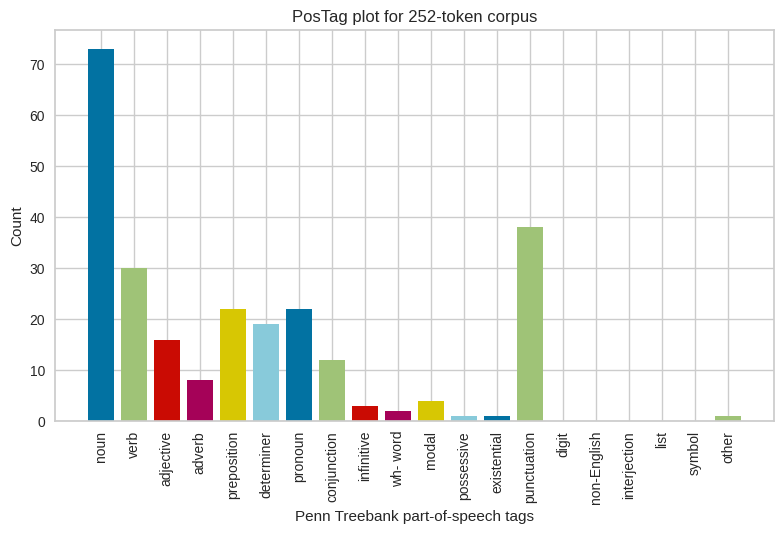

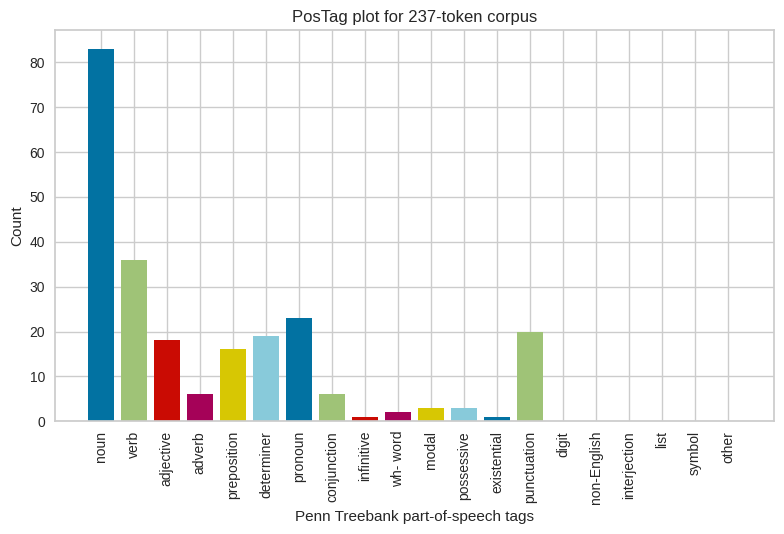

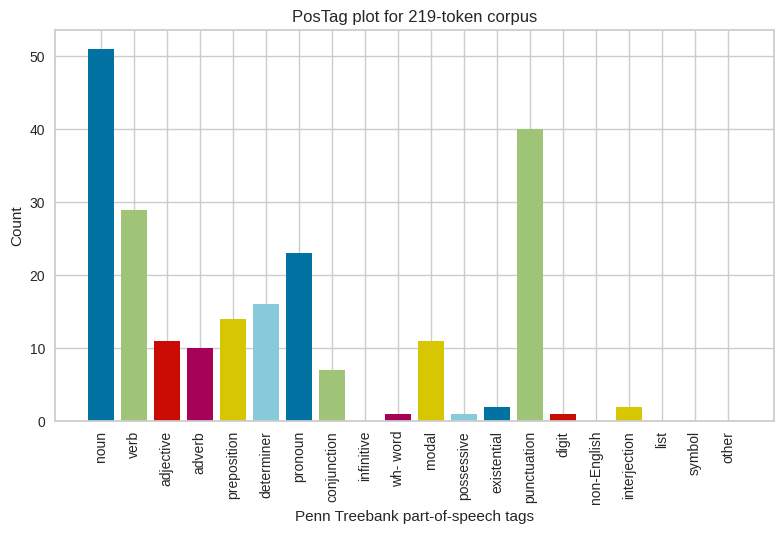

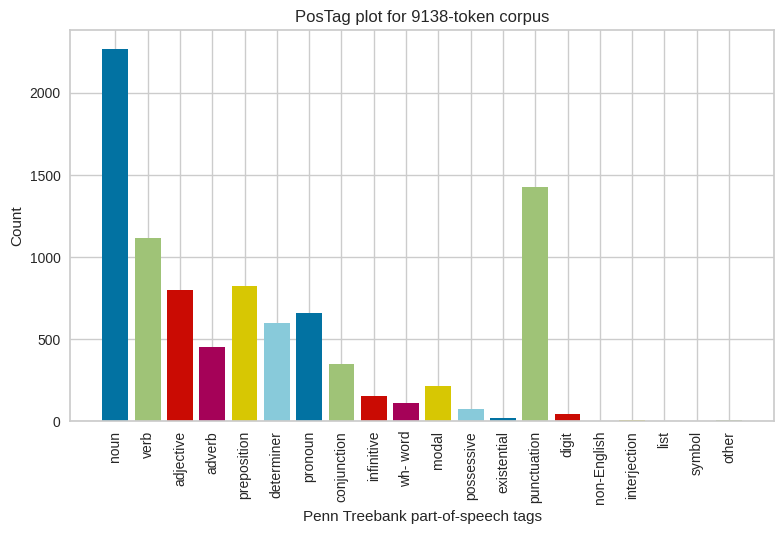

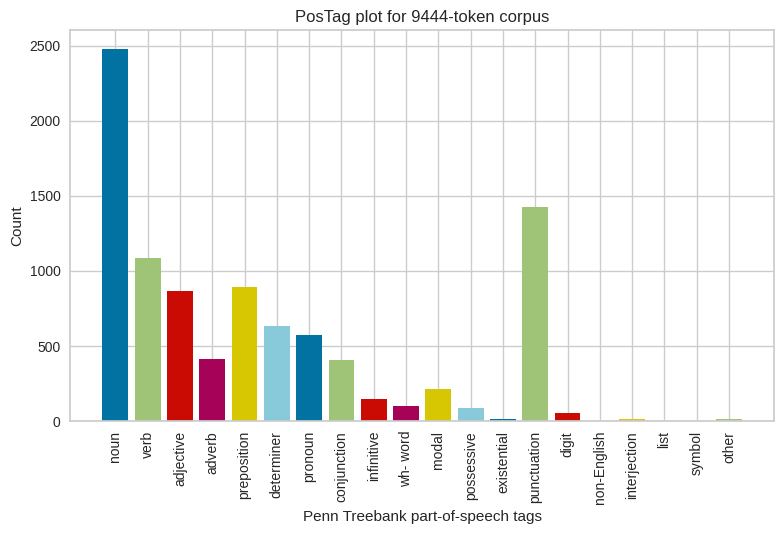

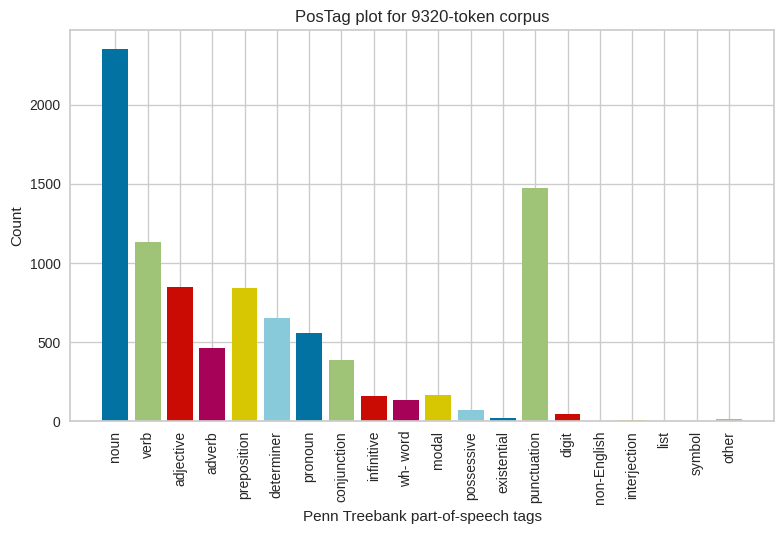

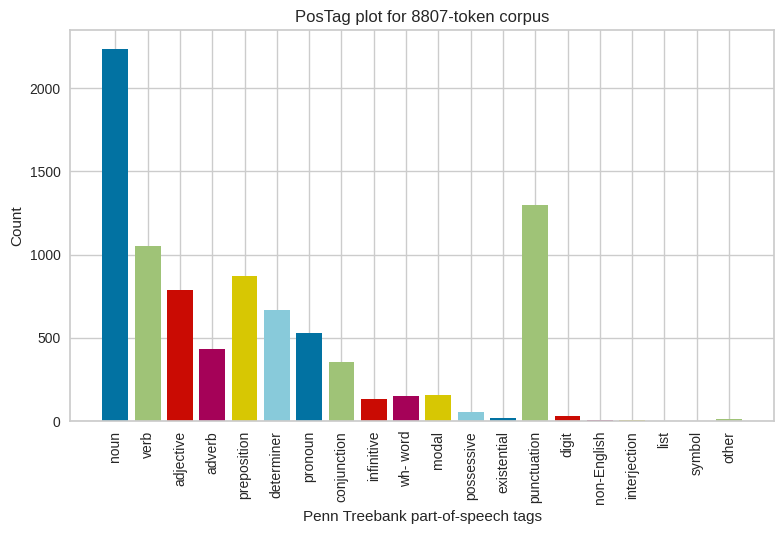

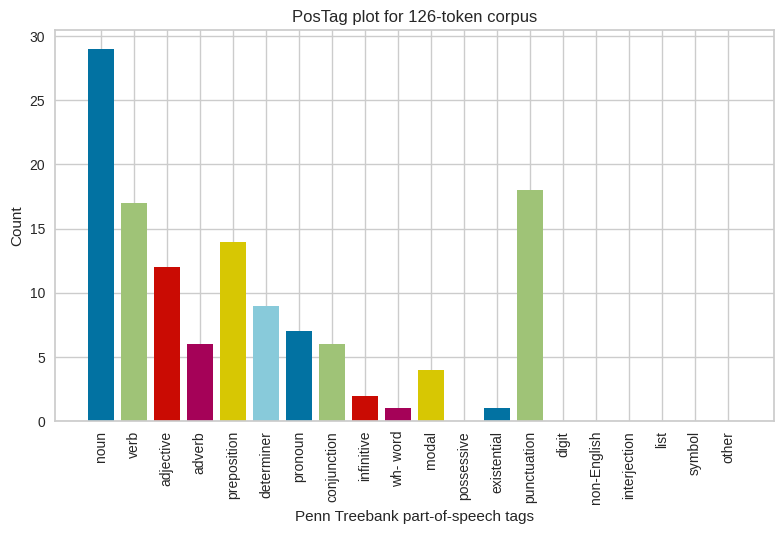

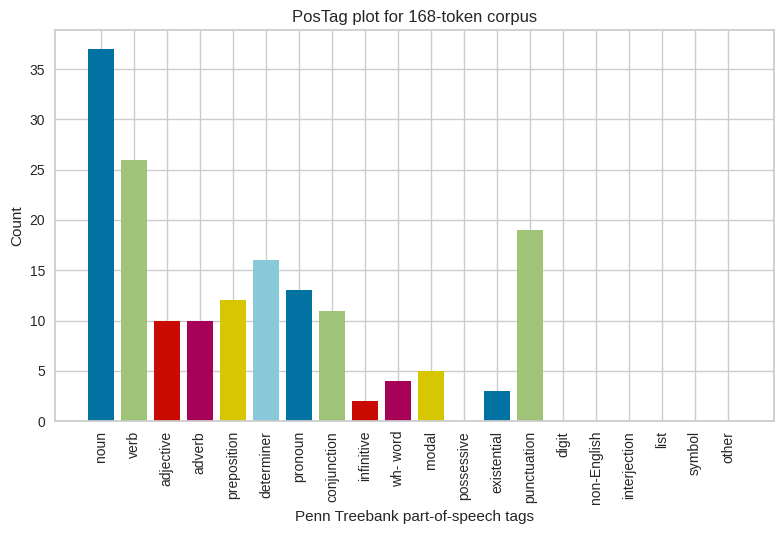

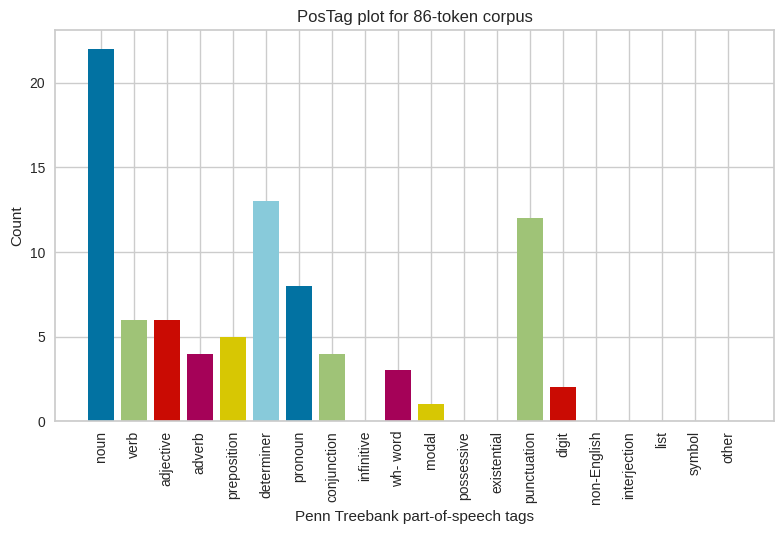

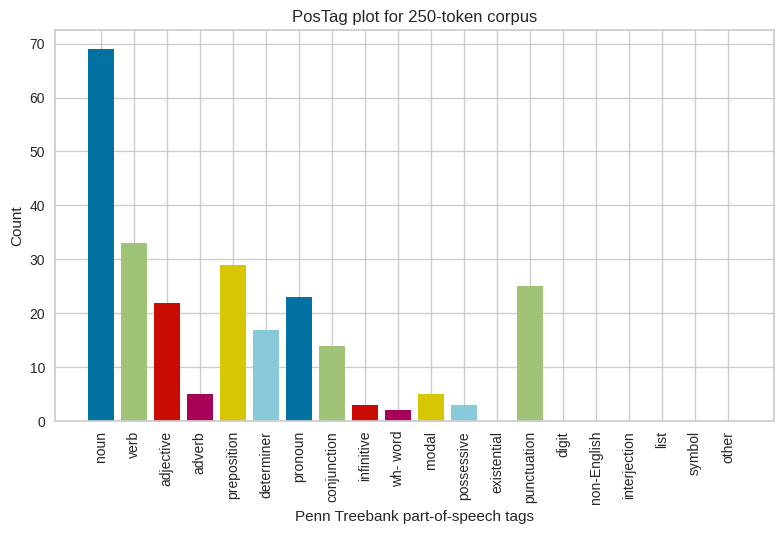

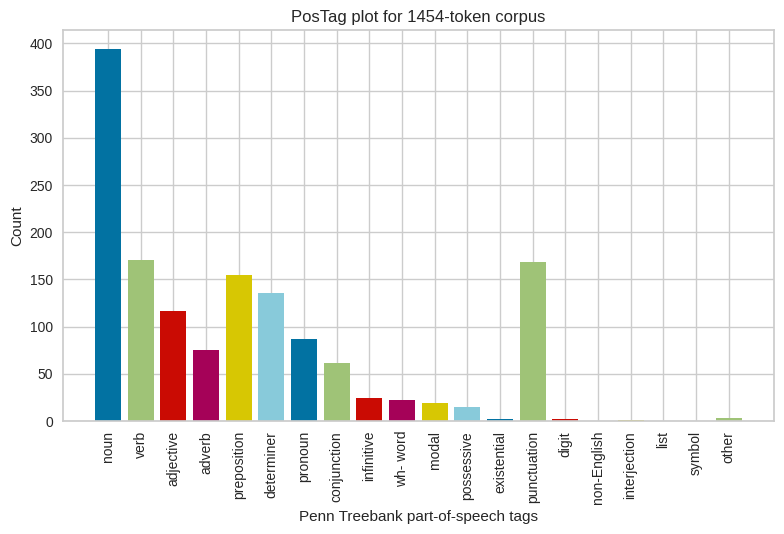

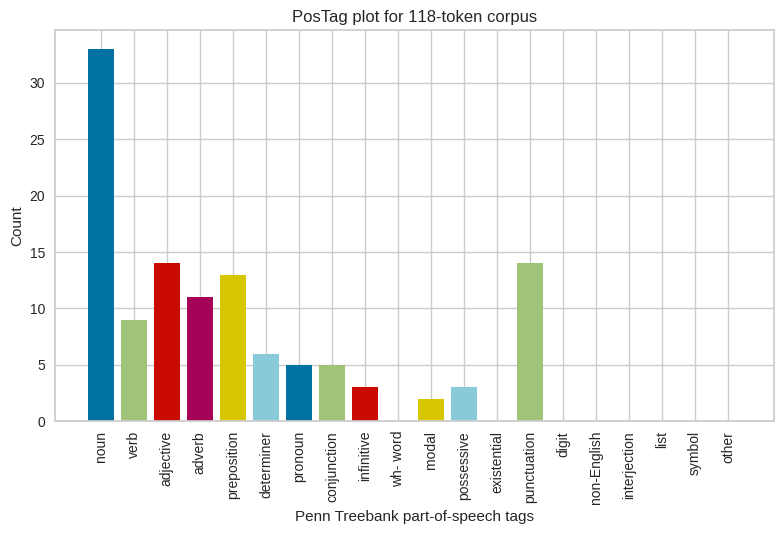

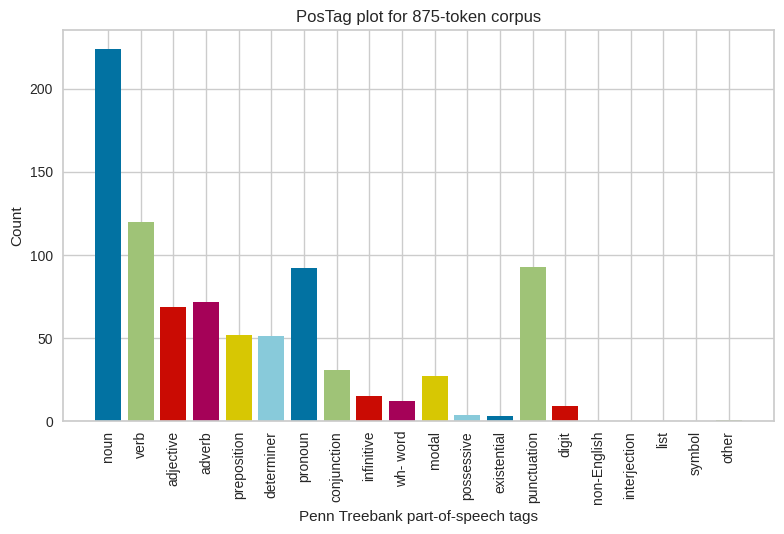

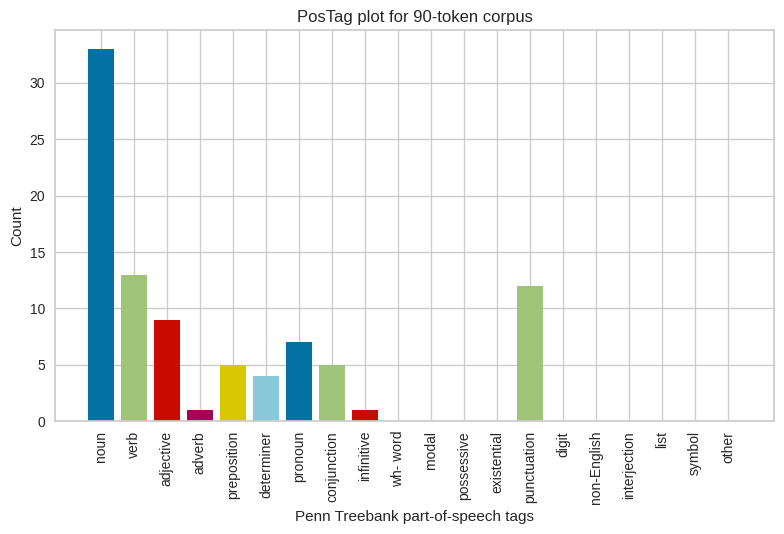

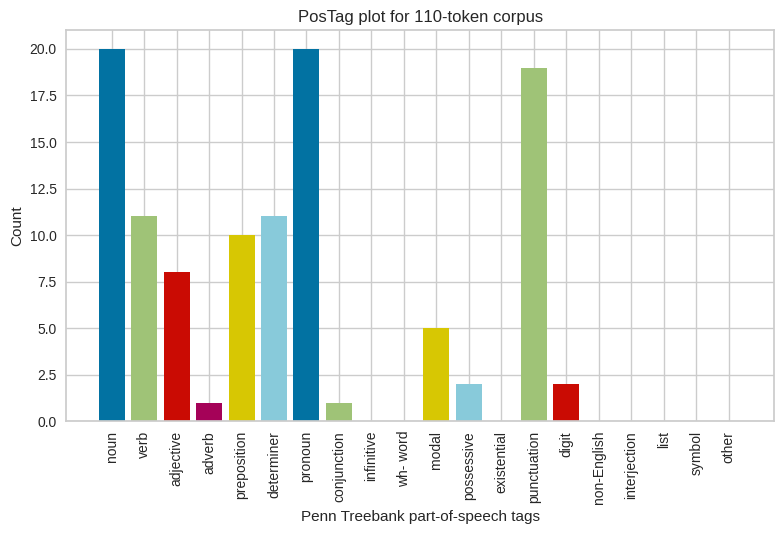

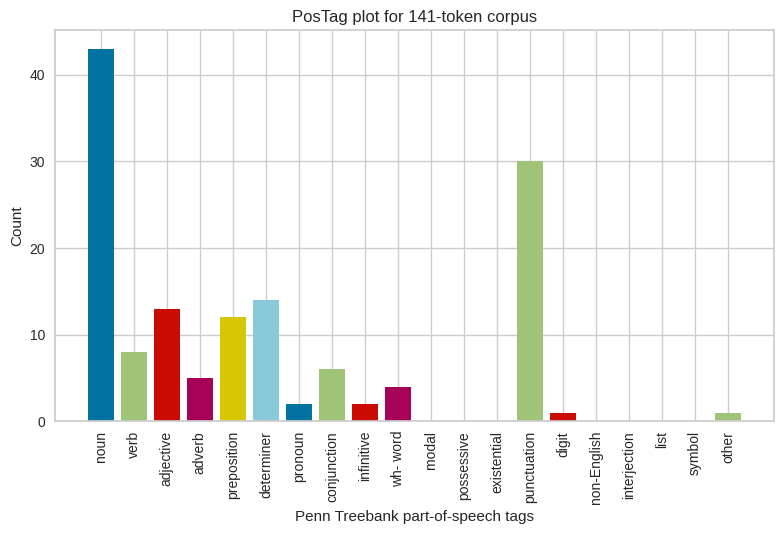

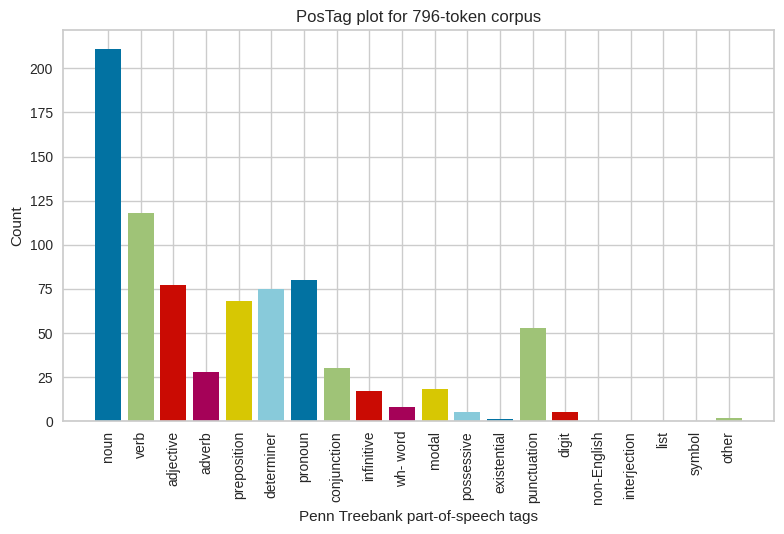

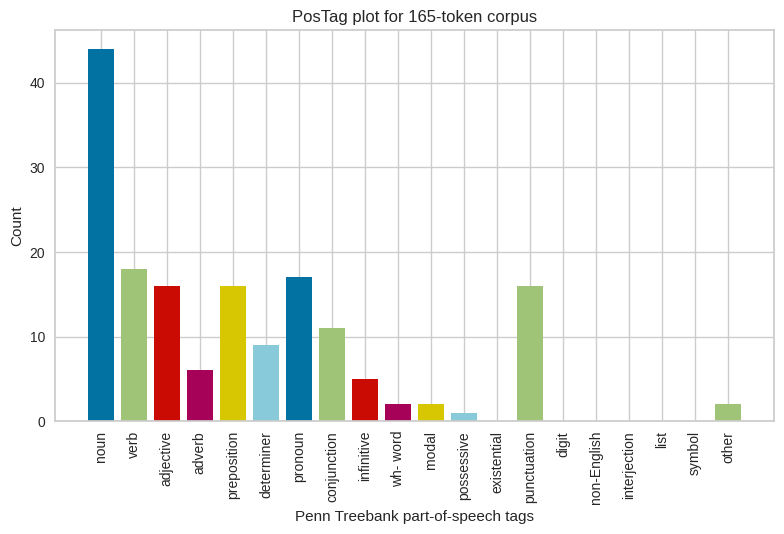

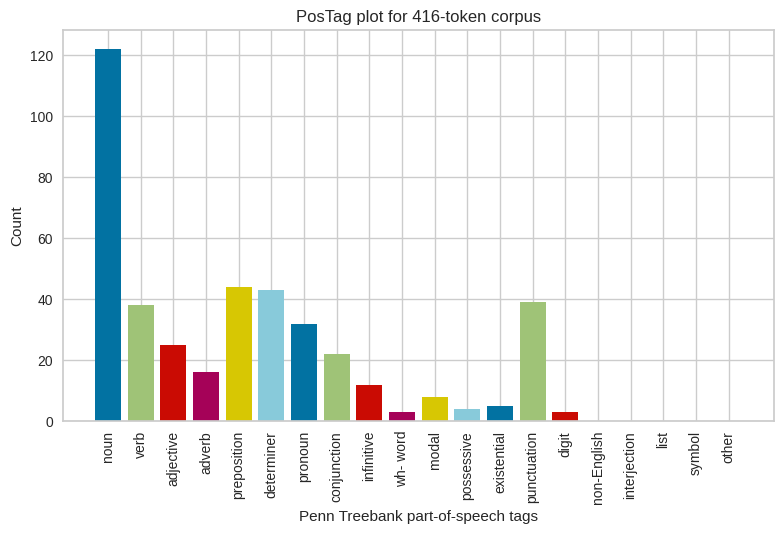

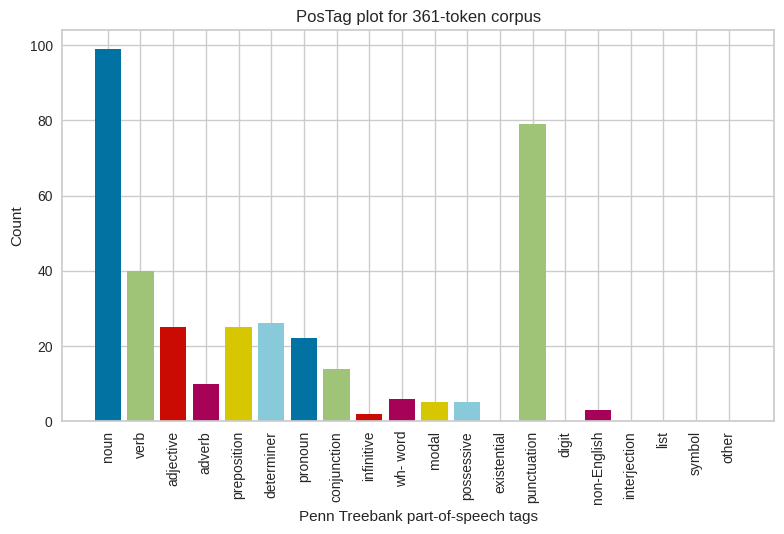

In [14]:
for val in poems_df['POS']:
  postag([[val]])

## Topic Analysis

In [15]:
def choherence_perplexity_calculator(poem_list):
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

  data_words = list(sent_to_words(poem_list))

  print(data_words[:1])
  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # See trigram example
  print(trigram_mod[bigram_mod[data_words[0]]])
  # Define functions for stopwords, bigrams, trigrams and lemmatization
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

  def make_bigrams(texts):
      return [bigram_mod[doc] for doc in texts]

  def make_trigrams(texts):
      return [trigram_mod[bigram_mod[doc]] for doc in texts]

  def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """https://spacy.io/api/annotation"""
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent))
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      return texts_out
  # Remove Stop Words
  #data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words)

  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
  # python3 -m spacy download en
  nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN']) #, 'ADJ', 'VERB', 'ADV'

  print(data_lemmatized[:1])
  # Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)

  # Create Corpus
  texts = data_lemmatized

  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # View
  print(corpus[:1])


  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  print(lda_model.print_topics())
  # Visualize the topics
  pyLDAvis.enable_notebook()
  vis = gensimvis.prepare(lda_model, corpus, id2word)
  # vis
  # Compute Perplexity
  print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)
  return vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Choherence of poems

In [16]:
temp_poems = [val['poem'] for val in poems]
coh = choherence_perplexity_calculator(temp_poems)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['hence', 'burgundy', 'claret', 'and', 'port', 'away', 'with', 'old', 'hock', 'and', 'madeira', 'too', 'earthly', 'ye', 'are', 'for', 'my', 'sport', 'there', 'beverage', 'brighter', 'and', 'clearer', 'instead', 'of', 'piriful', 'rummer', 'my', 'wine', 'overbrims', 'whole', 'summer', 'my', 'bowl', 'is', 'the', 'sky', 'and', 'drink', 'at', 'my', 'eye', 'till', 'feel', 'in', 'the', 'brain', 'delphian', 'pain', 'then', 'follow', 'my', 'caius', 'then', 'follow', 'on', 'the', 'green', 'of', 'the', 'hill', 'we', 'will', 'drink', 'our', 'fill', 'of', 'golden', 'sunshine', 'till', 'our', 'brains', 'intertwine', 'with', 'the', 'glory', 'and', 'grace', 'of', 'apollo', 'god', 'of', 'the', 'meridian', 'and', 'of', 'the', 'east', 'and', 'west', 'to', 'thee', 'my', 'soul', 'is', 'flown', 'and', 'my', 'body', 'is', 'earthward', 'press', 'it', 'is', 'an', 'awful', 'mission', 'terrible', 'division', 'and', 'leaves', 'gulph', 'austere', 'to', 'be', 'fill', 'with', 'worldly', 'fear', 'aye', 'when', 'the'

In [17]:
coh

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.098798  0.000356       1        1  62.760800
2      0.158717  0.008649       2        1  26.111072
3     -0.052638  0.143737       3        1   4.264639
5      0.018618 -0.037939       4        1   3.600404
6     -0.082109 -0.067137       5        1   2.334472
7     -0.023887 -0.010246       6        1   0.712077
0     -0.024293 -0.008199       7        1   0.143683
4     -0.031376 -0.009882       8        1   0.024284
8     -0.030966 -0.009468       9        1   0.024284
9     -0.030864 -0.009872      10        1   0.024284, topic_info=       Term       Freq      Total Category  logprob  loglift
14      eye  79.000000  79.000000  Default  30.0000  30.0000
276     day  57.000000  57.000000  Default  29.0000  29.0000
545    love  79.000000  79.000000  Default  28.0000  28.0000
120     air  43.000000  43.000000  Default  27.0000  27.0000
34     soul  39.000000  39.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
33      sky   0.000827  18.380773  Topic10  -7.8161  -1.6860
790   sound   0.000822  14.459424  Topic10  -7.8215  -1.4515
36   summer   0.000825  18.514255  Topic10  -7.8185  -1.6957
922   water   0.000829  26.120228  Topic10  -7.8130  -2.0343
554     man   0.000831  34.882903  Topic10  -7.8110  -2.3216

[676 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
971       2  1.027392  accent
982       2  1.027372   agony
120       1  0.694633     air
120       2  0.254699     air
120       3  0.023154     air
...     ...       ...     ...
963       2  0.522427    year
963       3  0.087071    year
967       1  0.638770   youth
967       2  0.319385   youth
967       4  0.039923   youth

[577 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 6, 7, 8, 1, 5, 9, 10])

## Scraping Articles

In [18]:
def clean_txt(text):
    text=text.replace(u'\xa0', u' ').replace(r'\r',u'\n').replace(r'\n', ' ').replace('\n', ' ').replace('\t', ' ')
    text = contractions.fix(text)
    text = text.strip().lower()
    text = re.sub(r"'", ' ', text)
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = ' '.join([w for w in text.split() if len(w)>1])
    text = re.sub(' +', ' ', text)
    text = ''.join(text)
    return text


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
def scrapeArticleFromURLs(url_list):
    results=[]
    for url in url_list:
        print(url)
        header = {'User-Agent':'Mozilla/5.0'}
        requests = urllib.request.Request(url,headers=header)
        requestread = urllib.request.urlopen(requests).read()
        soup = BeautifulSoup(requestread,'html.parser')
        raw = soup.find_all('p')
        temp = []
        for val in raw:
            temp.append(val.text)

        clean = (clean_txt(" ".join(temp)))
        results.append(clean)


    return results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
article_urls = [
    'https://www.amacad.org/publication/idea-nature-america',
    'http://www.arthistoryarchive.com/arthistory/fantasy/',
    'https://www.bartleby.com/essay/Love-And-Marriage-In-The-1800s-FCYYHEANVTT',
    'https://www.womenshistory.org/articles/history-romance',
    'https://www.worldhistory.org/Greek_Mythology/',
    'https://www.nytimes.com/2000/07/04/science/greek-myths-not-necessarily-mythical.html',
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
articles = scrapeArticleFromURLs(article_urls)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://www.amacad.org/publication/idea-nature-america
http://www.arthistoryarchive.com/arthistory/fantasy/
https://www.bartleby.com/essay/Love-And-Marriage-In-The-1800s-FCYYHEANVTT


https://www.womenshistory.org/articles/history-romance
https://www.worldhistory.org/Greek_Mythology/
https://www.nytimes.com/2000/07/04/science/greek-myths-not-necessarily-mythical.html


In [22]:
articles[1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'the enchanting world of fantasy art characteristics and significance by chaz patto may 2023 the fantasy art movement has captivated audiences with its imaginative and otherworldly creations this unique art form transports viewers to realms of magic mythical creatures and surreal landscapes through this essay we will explore the characteristics and significance of the fantasy art movement delving into its distinct qualities artistic techniques and enduring impact on the art world characteristics of fantasy art imagination and creativity fantasy art is characterized by its boundless imagination and limitless creativity artists within this movement conjure up fantastical worlds creatures and narratives that defy the constraints of reality through their artworks they tap into the depths of their imagination often drawing inspiration from folklore mythology literature and dreams magical and surreal imagery fantasy art often showcases magical and surreal imagery transporting viewers to ench

In [23]:
pos_articles = []
for val in (articles):
  i = {}
  i['POS'] = pos_tagging(val)
  i['Verb']= ([word for (word, pos) in i['POS'] if (pos.startswith('VB'))])
  i['Adjective']= ([word for (word, pos) in i['POS'] if (pos.startswith('J'))])
  i['Adverbs']= ([word for (word, pos) in i['POS'] if (pos.startswith('RB'))])
  i['Nouns']= ([word for (word, pos) in i['POS'] if (pos.startswith('NN'))])
  pos_articles.append(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
pos_articles[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'POS': [('leo', 'NN'),
  ('marx', 'VBD'),
  ('fellow', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('american', 'JJ'),
  ('academy', 'NN'),
  ('since', 'IN'),
  ('1972', 'CD'),
  ('is', 'VBZ'),
  ('senior', 'JJ'),
  ('lecturer', 'NN'),
  ('and', 'CC'),
  ('william', 'NN'),
  ('kenan', 'NN'),
  ('professor', 'NN'),
  ('of', 'IN'),
  ('american', 'JJ'),
  ('cultural', 'JJ'),
  ('history', 'NN'),
  ('emeritus', 'NN'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('program', 'NN'),
  ('in', 'IN'),
  ('science', 'NN'),
  ('technology', 'NN'),
  ('and', 'CC'),
  ('society', 'NN'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('massachusetts', 'NNP'),
  ('institute', 'NN'),
  ('of', 'IN'),
  ('technology', 'NN'),
  ('he', 'PRP'),
  ('is', 'VBZ'),
  ('the', 'DT'),
  ('author', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('machine', 'NN'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('garden', 'NN'),
  ('1964', 'CD'),
  ('the', 'DT'),
  ('pilot', 'NN'),
  ('and', 'CC'),
  ('the', 'DT'),
  ('passenger', 'NN'),
  ('1988', 'CD')

In [25]:
temp_articles = [val for val in articles]
coh_articles = choherence_perplexity_calculator(temp_articles)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['leo', 'marx', 'fellow', 'of', 'the', 'american', 'academy', 'since', 'is', 'senior', 'lecturer', 'and', 'william', 'kenan', 'professor', 'of', 'american', 'cultural', 'history', 'emeritus', 'in', 'the', 'program', 'in', 'science', 'technology', 'and', 'society', 'at', 'the', 'massachusetts', 'institute', 'of', 'technology', 'he', 'is', 'the', 'author', 'of', 'the', 'machine', 'in', 'the', 'garden', 'the', 'pilot', 'and', 'the', 'passenger', 'and', 'coeditor', 'of', 'does', 'technology', 'drive', 'history', 'with', 'merritt', 'roe', 'smith', 'the', 'idea', 'of', 'nature', 'is', 'or', 'rather', 'was', 'one', 'of', 'the', 'fundamental', 'american', 'ideas', 'in', 'its', 'time', 'it', 'served', 'as', 'the', 'ideas', 'of', 'freedom', 'democracy', 'or', 'progress', 'did', 'in', 'theirs', 'to', 'define', 'the', 'meaning', 'of', 'america', 'for', 'some', 'three', 'centuries', 'in', 'fact', 'from', 'the', 'founding', 'of', 'jamestown', 'in', 'to', 'the', 'closing', 'of', 'the', 'western', 'f

In [26]:
coh_articles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.346973 -0.017860       1        1  88.236084
2     -0.161083 -0.121406       2        1   6.834823
7     -0.075955  0.220131       3        1   3.516662
0     -0.100913 -0.042407       4        1   1.400886
4      0.078008 -0.016765       5        1   0.001924
6      0.000015 -0.003474       6        1   0.001924
1     -0.015003 -0.004986       7        1   0.001924
3     -0.019447 -0.004867       8        1   0.001924
9     -0.023232 -0.004224       9        1   0.001924
5     -0.029363 -0.004142      10        1   0.001924, topic_info=         Term         Freq        Total Category  logprob  loglift
41        art  2046.000000  2046.000000  Default  30.0000  30.0000
883   fantasy  1860.000000  1860.000000  Default  29.0000  29.0000
44     artist   826.000000   826.000000  Default  28.0000  28.0000
885   fiction   367.000000   367.000000  Default  27.0000  27.0000
901      game   369.000000   369.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
690     today     0.000378   110.862968  Topic10  -7.1862  -1.7306
879    expert     0.000382   151.213700  Topic10  -7.1748  -2.0296
1054     pulp     0.000379   130.529914  Topic10  -7.1825  -1.8902
92    century     0.000370    74.391780  Topic10  -7.2084  -1.3539
592      ring     0.000370   110.624647  Topic10  -7.2072  -1.7495

[619 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1157      4  0.961631     abundance
1158      4  0.961669   achievement
1159      4  0.961992  acquaintance
1160      4  0.961711      activity
1161      4  0.962006         adult
...     ...       ...           ...
754       1  0.936171        writer
754       2  0.046809        writer
754       4  0.015603        writer
756       2  0.667925          year
756       3  0.250472          year

[384 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 8, 1, 5, 7, 2, 4, 10, 6])

## Knowledge Graph

In [27]:
!pip install textacy
!pip install dateparser

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.1 MB/s eta 0:00:00


In [43]:
import warnings
warnings.filterwarnings("ignore")

## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for text
import nltk
import re

## for nlp
import spacy
from spacy import displacy
import textacy

## for graph
import networkx as nx
import plotly.graph_objs as go
## for timeline
import dateparser

In [44]:
def word_freq(txt, ngrams=1, top=10, figsize=(10,7)):
    lst_tokens = nltk.tokenize.word_tokenize(txt)

    ## calculate
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, ngrams))
    dtf_freq = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
    dtf_freq["ngrams"] = ngrams
    dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )


    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,
                data=dtf_freq)
    ax.set(xlabel=None, ylabel=None, title="Most frequent words")
    ax.grid(axis="x")
    plt.show()
    return dtf_freq

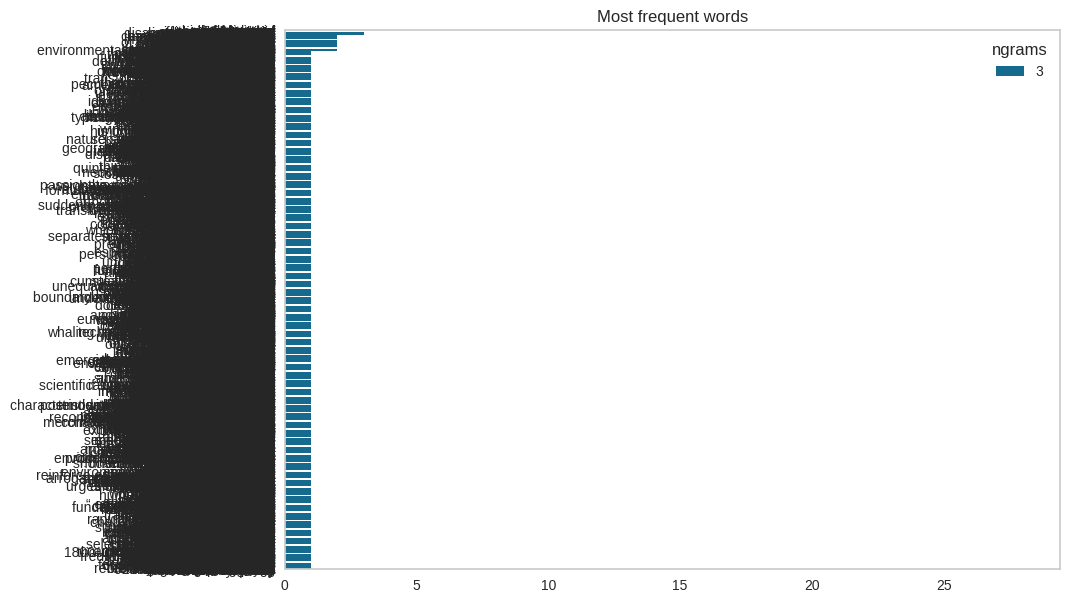

In [45]:
txt = articles[0]
_ = word_freq(txt, ngrams=3, top=30, figsize=(10,7))

In [46]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(txt)

In [47]:
lst_docs = [sent for sent in doc.sents]
print("tot sentences:", len(lst_docs))

i = 3
lst_docs[i]

tot sentences: 6


but they invariably accommodated their immediate impressions of american places to their imported typically religious preconceptions about the nature of nature and the character of indigenous peoples thus all of the significant american ideas of nature are hybrids conceived in europe and inflected by new world experience and each ideology that served as rationale for one or another colonial system of power contained such hybrid euro american conception of nature and of the colonists’ relations with it revealing example is the pilgrim leader william bradford’s well known description of the forbidding cape cod shoreline as seen from the deck of the mayflower in 1620 he depicts it as “a hidious and desolate wildernes full of wild beasts and wild men here the bias inherent in the christian idea of nature as fallen as satan’s domain effectively erases the humanity of the indigenous americans to bradford they are more like wild beasts than white men the concept of satanic nature provided use

In [48]:
print(lst_docs[i], "\n---")

for token in lst_docs[i]:
    print(token.text, "-->", "pos: "+token.pos_, "|", "dep: "+token.dep_, "")

but they invariably accommodated their immediate impressions of american places to their imported typically religious preconceptions about the nature of nature and the character of indigenous peoples thus all of the significant american ideas of nature are hybrids conceived in europe and inflected by new world experience and each ideology that served as rationale for one or another colonial system of power contained such hybrid euro american conception of nature and of the colonists’ relations with it revealing example is the pilgrim leader william bradford’s well known description of the forbidding cape cod shoreline as seen from the deck of the mayflower in 1620 he depicts it as “a hidious and desolate wildernes full of wild beasts and wild men here the bias inherent in the christian idea of nature as fallen as satan’s domain effectively erases the humanity of the indigenous americans to bradford they are more like wild beasts than white men the concept of satanic nature provided use

In [49]:
displacy.render(lst_docs[i], style="dep", options={"distance":100})

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="1b8487bd3b01493badd0b7f59bf52ca8-0" class="displacy" width="68550" height="1087.0" direction="ltr" style="max-width: none; height: 1087.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="997.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">but</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">CCONJ</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="997.0">\n    <tspan class="displacy-word" fill="currentColor" x="150">they</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="150">PRON</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="997.0">\n    <tspan class="displacy-word" fill="currentColor" x="250">invariably</tspan>\n    <tspan class="d

In [50]:
for tag in lst_docs[i].ents:
    print(tag.text, f"({tag.label_})")

american (NORP)
american (NORP)
europe (LOC)
one (CARDINAL)
american (NORP)
pilgrim (ORG)
william bradford (PERSON)
1620 (DATE)
christian (NORP)
americans (NORP)
1645 (DATE)
john winthrop (PERSON)
the massachusetts bay (LOC)
two (CARDINAL)
christians (NORP)
europe (LOC)
america (GPE)
the time thomas jefferson (ORG)
american (NORP)
alexander pope (PERSON)
night (TIME)
1776 (DATE)
jefferson (PERSON)


In [51]:
displacy.render(lst_docs[i], style="ent")


'<div class="entities" style="line-height: 2.5; direction: ltr">but they invariably accommodated their immediate impressions of \n<mark class="entity" style="background: #c887fb; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    american\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">NORP</span>\n</mark>\n places to their imported typically religious preconceptions about the nature of nature and the character of indigenous peoples thus all of the significant \n<mark class="entity" style="background: #c887fb; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    american\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">NORP</span>\n</mark>\n ideas of nature are hybrids conceived in \n<mark class="entity" style="background: #ff9561; padding

In [52]:

def extract_entities(doc):
    a, b, prev_dep, prev_txt, prefix, modifier = "", "", "", "", "", ""
    for token in doc:
        if token.dep_ != "punct":
            ## prexif --> prev_compound + compound
            if token.dep_ == "compound":
                prefix = prev_txt +" "+ token.text if prev_dep == "compound" else token.text

            ## modifier --> prev_compound + %mod
            if token.dep_.endswith("mod") == True:
                modifier = prev_txt +" "+ token.text if prev_dep == "compound" else token.text

            ## subject --> modifier + prefix + %subj
            if token.dep_.find("subj") == True:
                a = modifier +" "+ prefix + " "+ token.text
                prefix, modifier, prev_dep, prev_txt = "", "", "", ""

            ## if object --> modifier + prefix + %obj
            if token.dep_.find("obj") == True:
                b = modifier +" "+ prefix +" "+ token.text

            prev_dep, prev_txt = token.dep_, token.text

    # clean
    a = " ".join([i for i in a.split()])
    b = " ".join([i for i in b.split()])
    return (a.strip(), b.strip())

In [53]:
lst_entities = [extract_entities(i) for i in lst_docs]
lst_entities[i]

('independent they', 'nature')

In [54]:

def extract_relation(doc, nlp):
    matcher = spacy.matcher.Matcher(nlp.vocab)
    p1 = [{'DEP':'ROOT'},
          {'DEP':'prep', 'OP':"?"},
          {'DEP':'agent', 'OP':"?"},
          {'POS':'ADJ', 'OP':"?"}]
    matcher.add(key="matching_1", patterns=[p1])
    matches = matcher(doc)
    k = len(matches) - 1
    span = doc[matches[k][1]:matches[k][2]]
    return span.text

In [55]:
lst_relations = [extract_relation(i,nlp) for i in lst_docs]
lst_relations[i]

'is'

In [56]:
lst_attr = []
for x in lst_docs:
    attr = ""
    for tag in x.ents:
        attr = attr+tag.text if tag.label_=="DATE" else attr+""
    lst_attr.append(attr)

lst_attr[i]

'162016451776'

In [57]:
dtf = pd.DataFrame({"text":[doc.text for doc in lst_docs],
                    "entity":[i[0] for i in lst_entities],
                    "relation":lst_relations,
                    "object":[i[1] for i in lst_entities],
                    "attribute":lst_attr
                   })
dtf.head(3)

text           entity  \
0  leo marx fellow of the american academy since ...        rather it   
1  but it also should be said that the word natur...      american it   
2  but like australia continent even less develop...  geographical it   

          relation             object  \
0               be   american thought   
1             said       truly extent   
2  was exceptional  terrain landscape   

                                           attribute  
0  1972196419881994some three centuries1607189019...  
1                                                     
2

In [58]:
dic = {"id":[], "text":[], "entity":[], "relation":[], "object":[]}

for n,sentence in enumerate(lst_docs):
    lst_generators = list(textacy.extract.subject_verb_object_triples(sentence))
    for sent in lst_generators:
        subj = "_".join(map(str, sent.subject))
        obj  = "_".join(map(str, sent.object))
        relation = "_".join(map(str, sent.verb))
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic["entity"].append(subj)
        dic["object"].append(obj)
        dic["relation"].append(relation)

dtf = pd.DataFrame(dic)
dtf[dtf["id"]==i]

id                                               text  \
20   3  but they invariably accommodated their immedia...   
21   3  but they invariably accommodated their immedia...   
22   3  but they invariably accommodated their immedia...   
23   3  but they invariably accommodated their immedia...   
24   3  but they invariably accommodated their immedia...   
25   3  but they invariably accommodated their immedia...   
26   3  but they invariably accommodated their immedia...   
27   3  but they invariably accommodated their immedia...   
28   3  but they invariably accommodated their immedia...   
29   3  but they invariably accommodated their immedia...   
30   3  but they invariably accommodated their immedia...   
31   3  but they invariably accommodated their immedia...   
32   3  but they invariably accommodated their immedia...   
33   3  but they invariably accommodated their immedia...   
34   3  but they invariably accommodated their immedia...   
35   3  but they invariably accommodated their immedia...   
36   3  but they invariably accommodated their immedia...   
37   3  but they invariably accommodated their immedia...   
38   3  but they invariably accommodated their immedia...   
39   3  but they invariably accommodated their immedia...   
40   3  but they invariably accommodated their immedia...   
41   3  but they invariably accommodated their immedia...   
42   3  but they invariably accommodated their immedia...   
43   3  but they invariably accommodated their immedia...   
44   3  but they invariably accommodated their immedia...   
45   3  but they invariably accommodated their immedia...   

                      entity              relation  \
20                      they          accommodated   
21                        it             revealing   
22                        he               depicts   
23                    domain                erases   
24                   concept              provided   
25  john_lieutenant_governor                  used   
26                   enemies           had_charged   
27                        he              develops   
28                     those             may_enjoy   
29                        he                 given   
30                      they             consigned   
31                 character          was_conveyed   
32                     slave                 helps   
33                       who            constitute   
34                       who               misrule   
35                        he           underscored   
36          thomas_jefferson                 wrote   
37                    notion  was_being_supplanted   
38   machinery_obeys_physics                   had   
39                       god                  made   
40                    images                summed   
41                       god                  said   
42                        it                  made   
43                 jefferson             to_extend   
44                        he                   had   
45                      they         were_entitled   

                                               object  
20                                        impressions  
21                                            example  
22                                                 it  
23                                           humanity  
24                                               foil  
25                                                 it  
26                                                him  
27                                        distinction  
28                                                god  
29                                            liberty  
30                                               whom  
31                                           epithets  
32  to_justify_his_priori_condemnation_of_the_unre...  
33                                             threat  
34                                           location  
3

In [59]:
dtf = dtf[dtf["object"].str.len() < 20]

In [60]:
attribute = "date"
dic = {"id":[], "text":[], attribute:[]}

for n,sentence in enumerate(lst_docs):
    lst = list(textacy.extract.entities(sentence, include_types={"DATE"}))
    if len(lst) > 0:
        for attr in lst:
            dic["id"].append(n)
            dic["text"].append(sentence.text)
            dic[attribute].append(str(attr))
    else:
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic[attribute].append(np.nan)

dtf_att = pd.DataFrame(dic)
dtf_att = dtf_att[~dtf_att[attribute].isna()]
dtf_att[dtf_att["id"]==i]

id                                               text  date
13   3  but they invariably accommodated their immedia...  1620
14   3  but they invariably accommodated their immedia...  1645
15   3  but they invariably accommodated their immedia...  1776

In [61]:
G = nx.from_pandas_edgelist(dtf, source="entity", target="object", edge_attr="relation", create_using=nx.DiGraph())


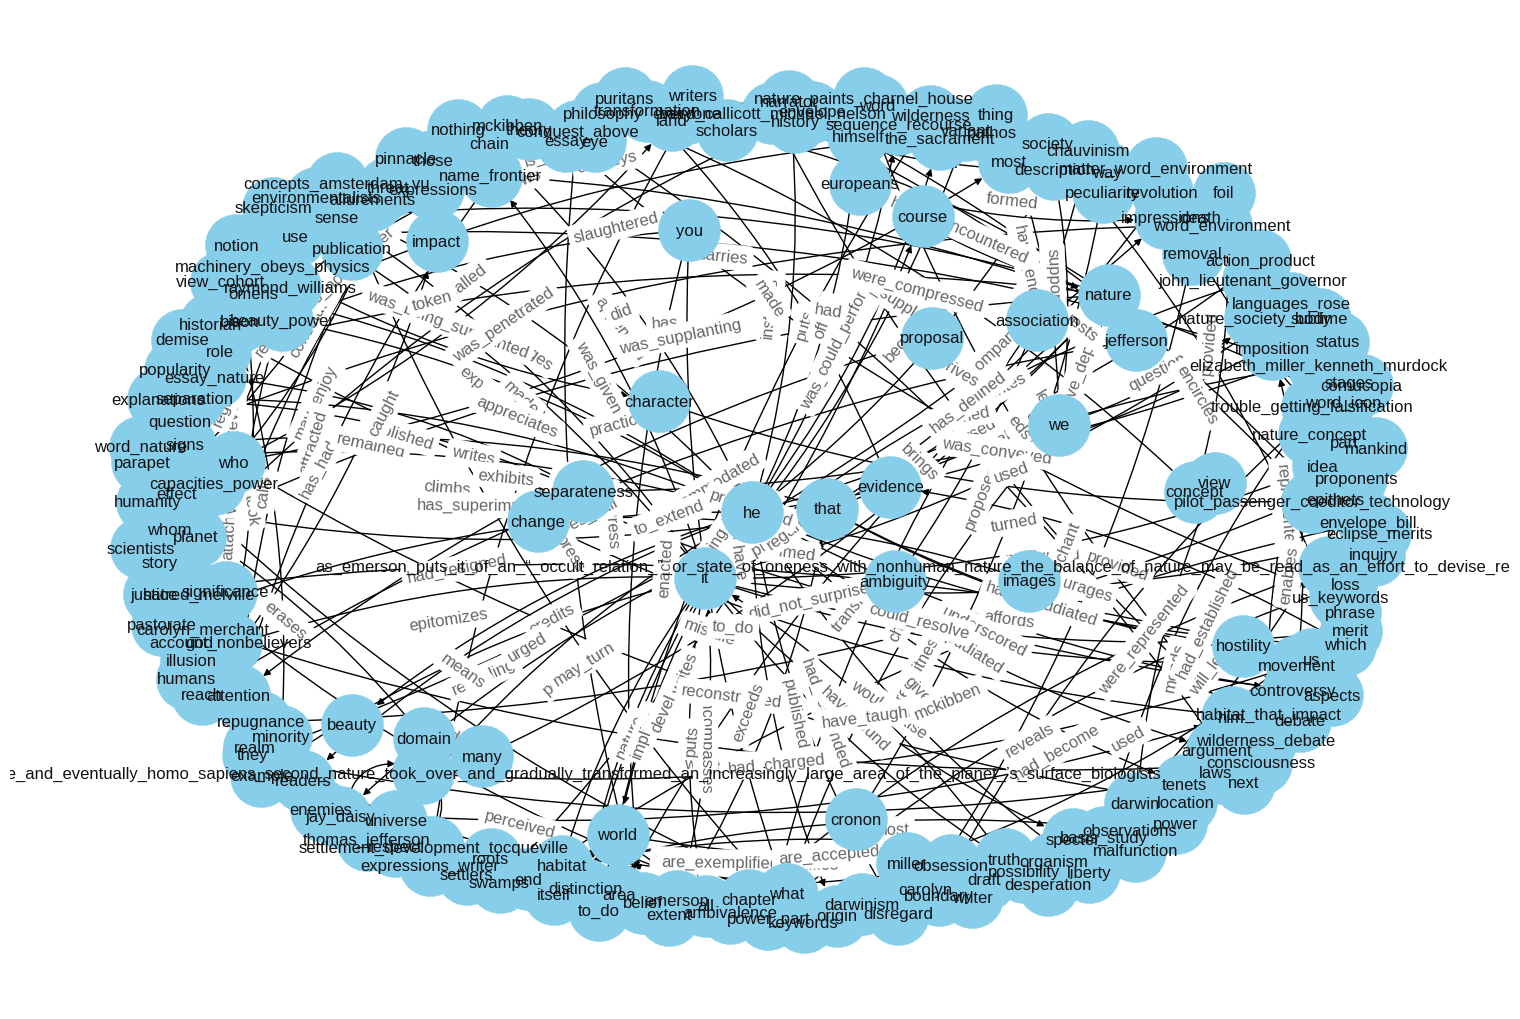

In [62]:
plt.figure(figsize=(15,10))

#pos = nx.nx_agraph.graphviz_layout(G, prog="fdp")
pos = nx.spring_layout(G, k=1)

node_color = "skyblue"
edge_color = "black"

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, edge_color=edge_color, cmap=plt.cm.Dark2,
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, edge_labels=nx.get_edge_attributes(G,'relation'),
                             font_size=12, font_color='black', alpha=0.6)
plt.show()

In [63]:
## top
dtf["entity"].value_counts().head()

entity
he        29
it        17
nature     8
that       7
we         7
Name: count, dtype: int64

In [64]:
f = "it"
tmp = dtf[(dtf["entity"]==f) | (dtf["object"]==f)]

G = nx.from_pandas_edgelist(tmp, source="entity", target="object", edge_attr="relation", create_using=nx.DiGraph())


In [65]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 11 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

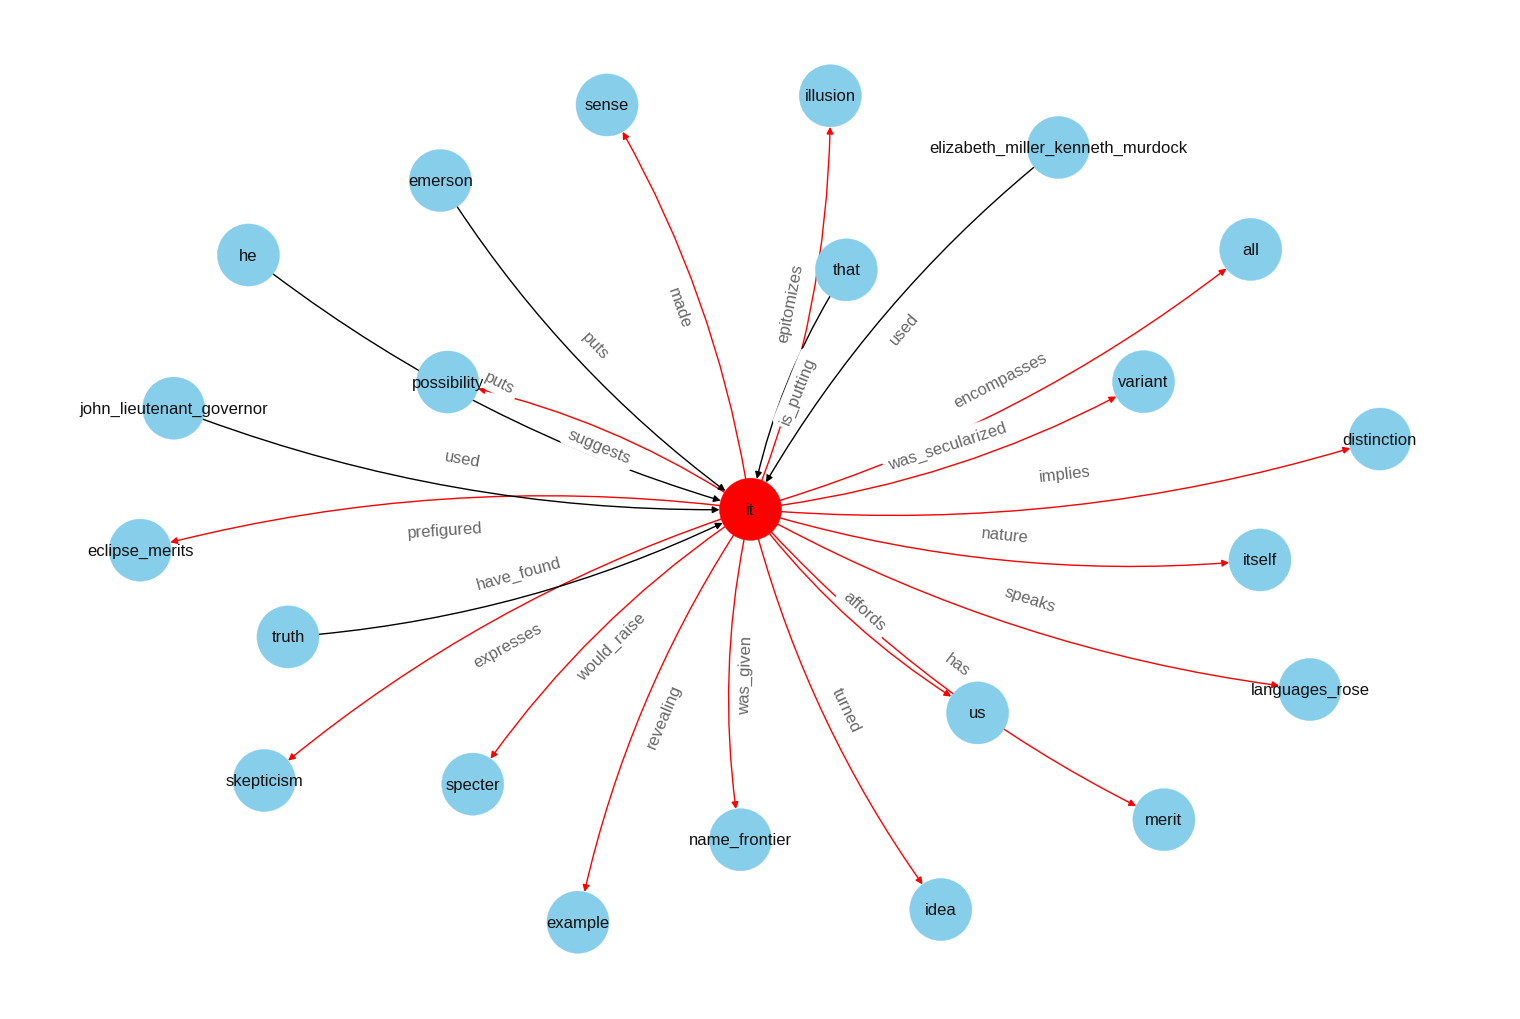

In [66]:
plt.figure(figsize=(15,10))

pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
#pos = nx.spring_layout(G, k=2.5)

node_color = ["red" if node==f else "skyblue" for node in G.nodes]
edge_color = ["red" if edge[0]==f else "black" for edge in G.edges]

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, edge_color=edge_color, cmap=plt.cm.Dark2,
        node_size=2000, node_shape="o", connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, edge_labels=nx.get_edge_attributes(G,'relation'),
                             font_size=12, font_color='black', alpha=0.6)
plt.show()

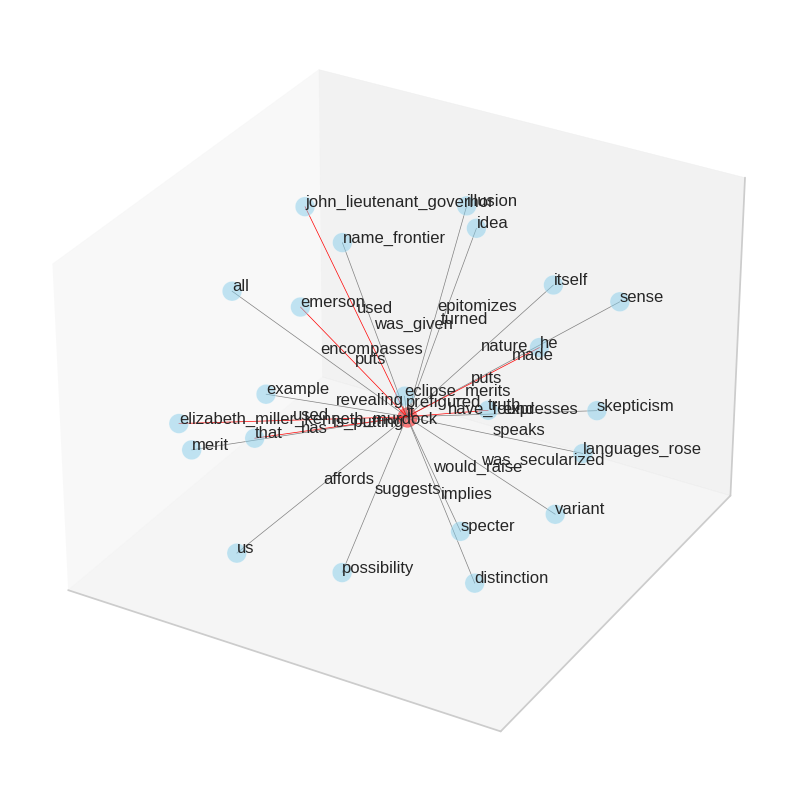

In [67]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection="3d")
pos = nx.spring_layout(G, k=2.5, dim=3)

nodes = np.array([pos[v] for v in sorted(G) if v!=f])
center_node = np.array([pos[v] for v in sorted(G) if v==f])

edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v!=f])
center_edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v==f])

ax.scatter(*nodes.T, s=200, ec="w", c="skyblue", alpha=0.5)
ax.scatter(*center_node.T, s=200, c="red", alpha=0.5)

for link in edges:
    ax.plot(*link.T, color="grey", lw=0.5)
for link in center_edges:
    ax.plot(*link.T, color="red", lw=0.5)

for v in sorted(G):
    ax.text(*pos[v].T, s=v)
for u,v in G.edges():
    attr = nx.get_edge_attributes(G, "relation")[(u,v)]
    ax.text(*((pos[u]+pos[v])/2).T, s=attr)

ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
ax.grid(False)
for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
    dim.set_ticks([])
plt.show()